In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [2]:
industrial_emissions= pd.read_excel('../../../data/raw/FLIGHT.xlsx', sheet_name="data")

In [3]:
industrial_emissions
industrial_emissions = industrial_emissions.drop(0, axis=0)

# Reset the index after deleting the row
industrial_emissions = industrial_emissions.reset_index(drop=True)
industrial_emissions

,Unnamed: 0,Bridgeport-Stamford-Norwalk,Hartford-east Hartford-Middletown,New Haven-Milford,Connecticut
0,Petroleum and Natural Gas Systems,54751,163416,144444,410327
1,Other,51826,177216,194958,616432
2,Pulp and Paper,0,17231,0,258235
3,Total reported emissions,2118076,1532451,3776944,10082082


In [4]:
# Access the last row and change cell values
last_row_index = industrial_emissions.index[-1]
industrial_emissions.loc[last_row_index, 'Bridgeport-Stamford-Norwalk'] = 106577  # Change the value in column 'A' of the last row
industrial_emissions.loc[last_row_index, 'Hartford-east Hartford-Middletown'] = 340632  # Change the value in column 'B' of the last row
industrial_emissions.loc[last_row_index, 'New Haven-Milford'] = 339402
industrial_emissions_data = industrial_emissions

In [5]:
# Create a DataFrame from the Series
industrial_emissions = pd.DataFrame({
    'GHG emissions (MMTCO2e)': [
        industrial_emissions['New Haven-Milford'][3]/1000000,
        industrial_emissions['Hartford-east Hartford-Middletown'][3]/1000000,
        industrial_emissions['Bridgeport-Stamford-Norwalk'][3]/1000000
    ]
})
# Create a new index with the same number of elements as the original DataFrame
new_index = ['New Haven-Milford', 'Hartford-east Hartford-Middletown','Bridgeport-Stamford-Norwalk']
industrial_emissions= industrial_emissions.rename(index=dict(zip(industrial_emissions.index, new_index)))

In [6]:
#scale up the emissions by population to incorporate the new towns
population_five_towns = pd.read_csv('../../../data/tidy/population_five_towns.csv')
population_five_towns = population_five_towns[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_five_towns_21 = population_five_towns.iloc[0,1:4]

population = pd.read_csv('../../../data/tidy/population.csv')
population = population[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_21 = population.iloc[0,1:4]
numeric_pop_21 = pd.to_numeric(population_21.str.replace(',', ''), errors='coerce')

ratio_NHM = population_five_towns_21[0]/numeric_pop_21[0]
ratio_HHM = population_five_towns_21[1]/numeric_pop_21[1]
ratio_BSN = population_five_towns_21[2]/numeric_pop_21[2]

# Define the numbers to multiply for each MSA
multipliers = {'New Haven-Milford': ratio_NHM, 'Hartford-east Hartford-Middletown': ratio_HHM, 'Bridgeport-Stamford-Norwalk': ratio_BSN}

# Multiply the values in the specified column by the respective multipliers
industrial_emissions['GHG emissions (MMTCO2e)'] = industrial_emissions['GHG emissions (MMTCO2e)'] * industrial_emissions.index.map(multipliers)
industrial_emissions

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8900\1654921276.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_NHM = population_five_towns_21[0]/numeric_pop_21[0]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8900\1654921276.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_HHM = population_five_towns_21[1]/numeric_pop_21[1]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8900\1654921276.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

,GHG emissions (MMTCO2e)
New Haven-Milford,0.339402
Hartford-east Hartford-Middletown,0.347809
Bridgeport-Stamford-Norwalk,0.109909


In [13]:
# Rename the row index
industrial_emissions.to_csv('../../../results/industrial-emissions-breakdown.csv')
industrial_emissions

,GHG emissions (MMTCO2e)
New Haven-Milford,0.339402
Hartford-east Hartford-Middletown,0.347809
Bridgeport-Stamford-Norwalk,0.109909


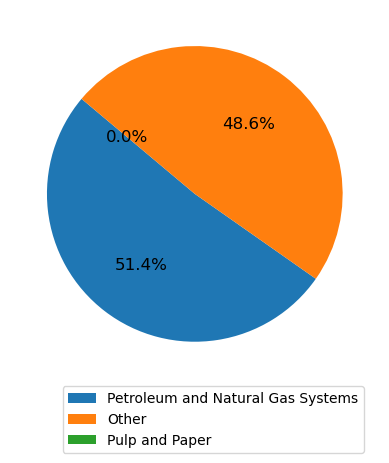

In [8]:
# Data to plot
labels = industrial_emissions_data['Unnamed: 0'][:3]
BSN = industrial_emissions_data['Bridgeport-Stamford-Norwalk'][:3]
HEM = industrial_emissions_data['Hartford-east Hartford-Middletown'][:3]
NHM = industrial_emissions_data['New Haven-Milford'][:3]


# Create a pie chart
plt.pie(BSN,  autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})



plt.legend(labels, loc='upper center', bbox_to_anchor=(0.55, -0.001))


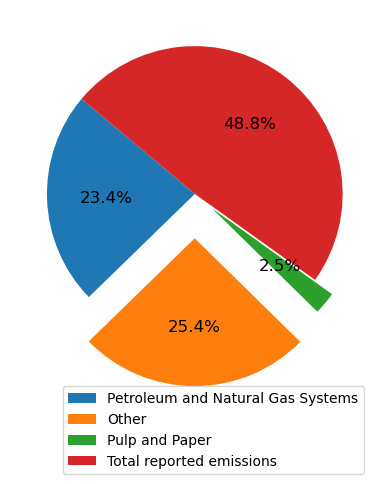

In [9]:
# Data to plot
labels = industrial_emissions_data['Unnamed: 0'][:4]
BSN = industrial_emissions_data['Bridgeport-Stamford-Norwalk'][:4]
HEM = industrial_emissions_data['Hartford-east Hartford-Middletown'][:4]
NHM = industrial_emissions_data['New Haven-Milford'][:4]

explode = (0, 0.3, 0.15, 0)
# Create a pie chart
plt.pie(HEM, autopct='%1.1f%%', startangle=140, explode=explode,  textprops={'fontsize': 12})

plt.legend(labels, loc='upper center', bbox_to_anchor=(0.55, -0.001))


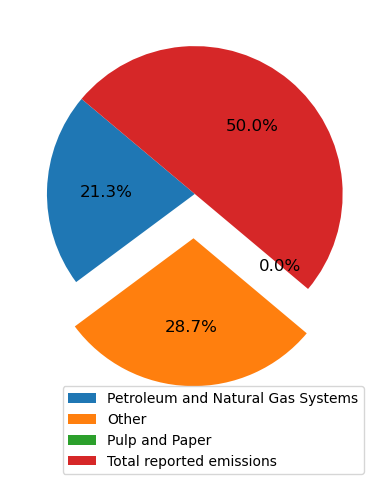

In [10]:
# Data to plot
labels = industrial_emissions_data['Unnamed: 0'][:4]
BSN = industrial_emissions_data['Bridgeport-Stamford-Norwalk'][:4]
HEM = industrial_emissions_data['Hartford-east Hartford-Middletown'][:4]
NHM = industrial_emissions_data['New Haven-Milford'][:4]

explode = (0, 0.3, 0.15, 0)
# Create a pie chart
plt.pie(NHM, autopct='%1.1f%%', startangle=140, explode=explode,  textprops={'fontsize': 12})
plt.legend(labels, loc='upper center', bbox_to_anchor=(0.55, -0.001))



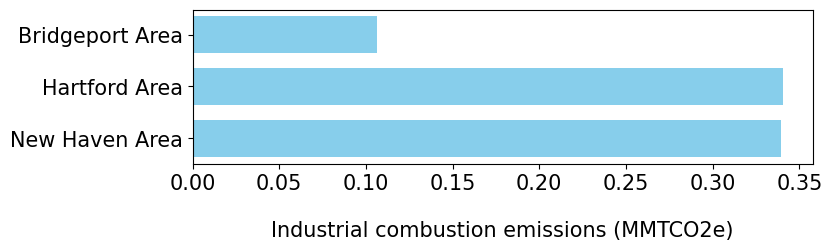

In [11]:
X = ['Bridgeport Area','Hartford Area', 'New Haven Area']
X=X[::-1]
values = industrial_emissions_data.loc[3, ["Bridgeport-Stamford-Norwalk","Hartford-east Hartford-Middletown","New Haven-Milford"]]
values=values[::-1]

# Create a bar chart
plt.figure(figsize=(8, 2))
plt.barh(X, values/1000000, 0.7,color='skyblue')

plt.xlabel('Industrial combustion emissions (MMTCO2e)', fontsize=15,labelpad=20)
plt.xticks(fontsize=15)  # Adjust the font size as needed
plt.yticks(fontsize=15)
plt.savefig('../../../figures/Report-images/industrial-MSA-emissions.png', dpi=600,bbox_inches='tight')

In [12]:
industrial_emissions_data

,Unnamed: 0,Bridgeport-Stamford-Norwalk,Hartford-east Hartford-Middletown,New Haven-Milford,Connecticut
0,Petroleum and Natural Gas Systems,54751,163416,144444,410327
1,Other,51826,177216,194958,616432
2,Pulp and Paper,0,17231,0,258235
3,Total reported emissions,106577,340632,339402,10082082
